In [3]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('PySparkML').getOrCreate()

In [27]:
data = spark.read.csv('test1.csv', header=True, inferSchema=True)

In [28]:
data.show()

+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Ahmed| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|     Mahi| 21|         1| 15000|
|     Gill| 23|         2| 18000|
|      Ali| 20|         2| 14000|
|    Basit| 25|         4| 20000|
+---------+---+----------+------+



In [29]:
data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



In [30]:
# age and experience are independent features
data.columns

['Name', 'age', 'Experience', 'Salary']

#### Grouped ['age' and 'experience'] columns as an ['Independent Features'] column

In [31]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=["age","Experience"],outputCol="Independent Features")

In [32]:
output = featureassembler.transform(data)

In [33]:
output.show()

+---------+---+----------+------+--------------------+
|     Name|age|Experience|Salary|Independent Features|
+---------+---+----------+------+--------------------+
|    Ahmed| 31|        10| 30000|         [31.0,10.0]|
|Sudhanshu| 30|         8| 25000|          [30.0,8.0]|
|    Sunny| 29|         4| 20000|          [29.0,4.0]|
|     Paul| 24|         3| 20000|          [24.0,3.0]|
|     Mahi| 21|         1| 15000|          [21.0,1.0]|
|     Gill| 23|         2| 18000|          [23.0,2.0]|
|      Ali| 20|         2| 14000|          [20.0,2.0]|
|    Basit| 25|         4| 20000|          [25.0,4.0]|
+---------+---+----------+------+--------------------+



In [34]:
finalized_data=output.select("Independent Features","Salary")

In [35]:
finalized_data.show()

+--------------------+------+
|Independent Features|Salary|
+--------------------+------+
|         [31.0,10.0]| 30000|
|          [30.0,8.0]| 25000|
|          [29.0,4.0]| 20000|
|          [24.0,3.0]| 20000|
|          [21.0,1.0]| 15000|
|          [23.0,2.0]| 18000|
|          [20.0,2.0]| 14000|
|          [25.0,4.0]| 20000|
+--------------------+------+



### Linear Regression 

In [36]:
from pyspark.ml.regression import LinearRegression
##train test split
train,test = finalized_data.randomSplit([0.75,0.25])
regressor  = LinearRegression(featuresCol='Independent Features', labelCol='Salary')
regressor  = regressor.fit(train_data)

In [37]:
### Coefficients
regressor.coefficients

DenseVector([305.4274, 1229.1754])

In [38]:
### Intercepts
regressor.intercept

7251.237312306525

In [40]:
train.show()

+--------------------+------+
|Independent Features|Salary|
+--------------------+------+
|          [21.0,1.0]| 15000|
|          [23.0,2.0]| 18000|
|          [24.0,3.0]| 20000|
|          [25.0,4.0]| 20000|
|          [29.0,4.0]| 20000|
|          [30.0,8.0]| 25000|
|         [31.0,10.0]| 30000|
+--------------------+------+



In [41]:
test.show()

+--------------------+------+
|Independent Features|Salary|
+--------------------+------+
|          [20.0,2.0]| 14000|
+--------------------+------+



In [42]:
### Prediction
pred_results = regressor.evaluate(test)

In [43]:
pred_results.predictions.show()

+--------------------+------+-----------------+
|Independent Features|Salary|       prediction|
+--------------------+------+-----------------+
|          [20.0,2.0]| 14000|15818.13606241094|
+--------------------+------+-----------------+



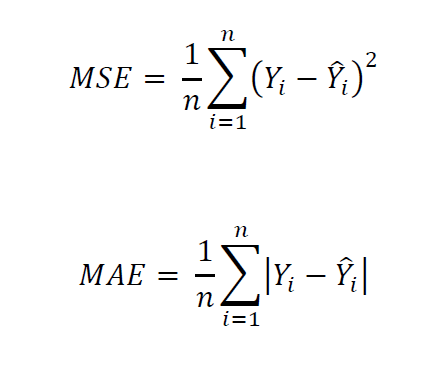

In [44]:
pred_results.meanAbsoluteError

1818.1360624109402

In [45]:
pred_results.meanSquaredError

3305618.741439158